Tomando como ejemplo el conteo de operaciones de *comparación* en el algoritmo de ordenación por selección, estudiaremos cómo varía la cantidad de operaciones según el caso de entrada y estimaremos la complejidad del caso promedio.

# Ejercicios

## 1. Contando operaciones

1\.1 Implementar las funciones $\texttt{swap}$, $\texttt{insert}$ y $\texttt{selection_sort}$ como se vieron en el teórico. 

In [10]:
def swap(arreglo,i,j):
    n = arreglo[i]
    arreglo[i] = arreglo[j]
    arreglo[j] = n
    return

In [11]:
def insert(arreglo, indice):
    elem = arreglo[indice]
    j = indice - 1
    encontre = False
    comparaciones = 0
    while(j >= 0 and (not encontre)):
        if elem >= arreglo[j]:
            encontre = True
        else:
            swap(arreglo, j, j+1)
            j -= 1
        comparaciones += 1
        #print (arreglo)
    #print ("Comparaciones: ", comparaciones)
    return comparaciones

In [12]:
def insertion_sort(arreglo):
    comparaciones = 0
    for i in range(1,len(arreglo)):
        comparaciones += insert(arreglo, i)
    #print ("Comparaciones: ", comparaciones)
    #return arreglo, comparaciones
    return comparaciones

In [13]:
a = [34,5,8,19,1]
insertion_sort(a)

9

In [14]:
a = [41,15,8,9,11]
insertion_sort(a)

9

In [15]:
a = [77,3,21,9,50,44]
insertion_sort(a)

11

1\.2 Probemos ahora el algoritmo con un caso sencillo:
 * crear un arreglo $a$ con $5$ elementos y reordenarlos al azar
 * correr $\texttt{insertion_sort}$ y asegurarse de que $a$ queda ordenado

1\.3 Modificar $\texttt{insert}$ e $\texttt{insertion_sort}$ para que además al ser llamados, devuelvan la cantidad de comparaciones que realizan.

1\.4 Probar nuevamente con un arreglo de $5$ elementos ordenados al azar, y comprobar además que el número de comparaciones devuelto es correcto.

## 2. Estimando el caso promedio

2\.1 Usando las funciones de la sección anterior, generar $500$ reordenaciones de un arreglo de $20$ elementos y guardar en una lista los conteos de comparaciones obtenidos en cada caso.

In [16]:
from random import shuffle
lista = list(range(20))

lista_comparaciones = []

for i in range(500):
    shuffle(lista)
    lista_comparaciones.append(insertion_sort(lista))

lista_comparaciones
#len(lista_comparaciones)

[94,
 124,
 128,
 86,
 106,
 114,
 105,
 137,
 108,
 117,
 100,
 136,
 111,
 119,
 129,
 114,
 116,
 104,
 84,
 106,
 103,
 134,
 98,
 124,
 116,
 105,
 98,
 123,
 120,
 130,
 94,
 106,
 109,
 107,
 105,
 152,
 97,
 100,
 113,
 116,
 99,
 127,
 93,
 94,
 104,
 91,
 103,
 105,
 104,
 120,
 119,
 121,
 136,
 110,
 101,
 127,
 106,
 115,
 128,
 73,
 102,
 131,
 99,
 105,
 125,
 110,
 128,
 105,
 123,
 99,
 89,
 101,
 97,
 113,
 112,
 101,
 120,
 86,
 84,
 95,
 120,
 105,
 127,
 103,
 120,
 110,
 117,
 89,
 138,
 104,
 114,
 106,
 109,
 107,
 116,
 122,
 100,
 126,
 121,
 103,
 110,
 102,
 87,
 109,
 131,
 114,
 103,
 101,
 140,
 113,
 89,
 113,
 96,
 136,
 106,
 108,
 108,
 98,
 104,
 117,
 95,
 111,
 99,
 106,
 127,
 127,
 95,
 121,
 139,
 136,
 100,
 116,
 104,
 80,
 118,
 106,
 93,
 106,
 126,
 111,
 98,
 106,
 110,
 112,
 113,
 114,
 100,
 99,
 96,
 93,
 110,
 141,
 121,
 90,
 129,
 125,
 119,
 122,
 114,
 125,
 111,
 115,
 111,
 108,
 115,
 123,
 137,
 114,
 97,
 124,
 90,
 111,
 100

2\.2 Usando $\texttt{matplotlib}$, construir un gráfico de barras mostrando todos los conteos de operaciones obtenidos, en forma ordenada. Esto nos va a permitir apreciar cómo se distribuyen entre el peor y el mejor caso.

In [17]:
# (esta línea hace que los gráficos que generemos se visualicen dentro del notebook)
%matplotlib inline 
import matplotlib.pyplot as plt




<Container object of 500 artists>

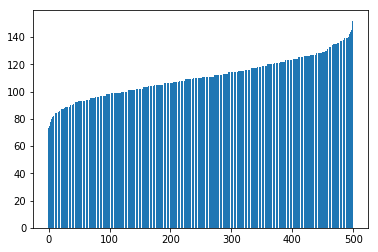

In [18]:
insertion_sort(lista_comparaciones)
plt.bar(list(range(500)), lista_comparaciones)

# 3. ¿Cómo varía $\texttt{ops}_c$ cuando n crece?

3\.1 Definir una función que tome el largo $n$ del arreglo y la cantidad $m$ de casos de prueba, y realice $m$ pruebas sobre arreglos de entrada ordenados al azar. La función debe devolver el valor promedio de $\texttt{ops}_c$ sobre todos estos casos.

In [42]:
def promedio_ops_comp(n, m):
    from random import shuffle
    lista = list(range(n))
    lista_comparaciones = []

    for i in range(m):
        shuffle(lista)
        lista_comparaciones.append(insertion_sort(lista))
    promedio = 0
    for i in lista_comparaciones:
        promedio += i
    promedio /= m
    return promedio


In [50]:
promedio_ops_comp(20,500)

111.564

3\.2 Usando la función definida en el paso anterior, estimar la cantidad de operaciones promedio para arreglos de longitudes $n$ entre $20$ y $500$ (inclusive), haciendo variar $n$ de $20$ en $20$ (o sea: $n = 20, 40, \ldots, 480, 500$). En cada caso, obtener el promedio tomando $500$ casos al azar.  

In [72]:
def promedio_ops_comp_2():
    from random import shuffle
    lista = list(range(20,501,20))
    lista_comparaciones = []

    for i in range(500):
        shuffle(lista)
        lista_comparaciones.append(insertion_sort(lista))
    promedio = 0
    for i in lista_comparaciones:
        promedio += i
    promedio /= 500
    return promedio, plt.plot(lista,lista_comparaciones)

ValueError: x and y must have same first dimension, but have shapes (25,) and (500,)

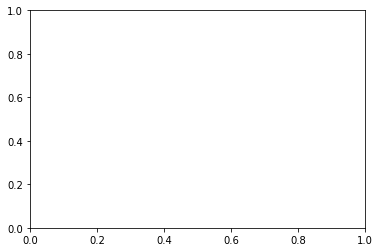

In [73]:
promedio_ops_comp_2()

3\.3 Graficar $\texttt{ops}_c$ promedio en función de $n$. ¿Qué forma esperamos que tenga el gráfico según lo visto en el teórico?

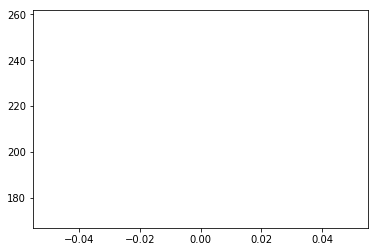

In [69]:
y = promedio_ops_comp(31,150)

plt.plot?


plt.plot(promedio_ops_comp_2())

In [71]:
plt.plot?

3\.4 Graficar además la función $n^2$ sobre el mismo rango de valores de $n$ de antes. ¿Qué pueden observar? ¿En qué se parecen y diferencian los dos gráficos?